[-2.45200607  1.0648675 ] [12.24343513  3.69775737]


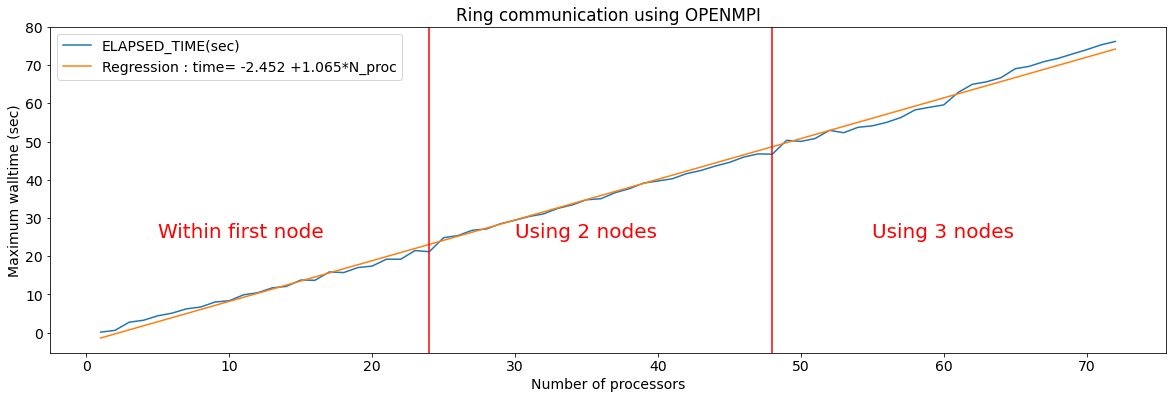

In [16]:
import csv
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
x = range(1,73)
y1 = []
y2 = []
z1 = []
z2 = []

plt.rc('font', size=14) 
plt.figure(figsize=(20,6))

with open('output_ring','r') as File:  
    Lines = csv.reader(File, delimiter = ',')
    for row2 in Lines:
        y1.append(float(row2[0]))
        
for index in range(0,72):
    y2.append((4*(x[index]**2))/float(y1[index]))

def func(x_i, a,b):
    return a + b*x_i

popt, pcov = curve_fit(func, x, y1)
popt1, pcov1 = curve_fit(func, x, y2)

for data in x:
    z1.append(popt[0]+popt[1]*data)
    z2.append(popt1[0]+popt1[1]*data)

print(popt,popt1)
plt.plot(x, y1, label = "ELAPSED_TIME(sec)")
plt.plot(x,z1, label = "Regression : time= -2.452 +1.065*N_proc")
plt.xlabel('Number of processors')
plt.ylabel('Maximum walltime (sec)')
plt.text(5,25,'Within first node',color='red',fontsize=20)
plt.text(30,25,'Using 2 nodes',color='red',fontsize=20)
plt.text(55,25,'Using 3 nodes',color='red',fontsize=20)
plt.axvline(24, 0, 40,color ="red")
plt.axvline(48, 0, 40,color ="red")
plt.title('Ring communication using OPENMPI')
plt.legend()
#plt.show()
plt.savefig('ring_plot.jpg', bbox_inches='tight')

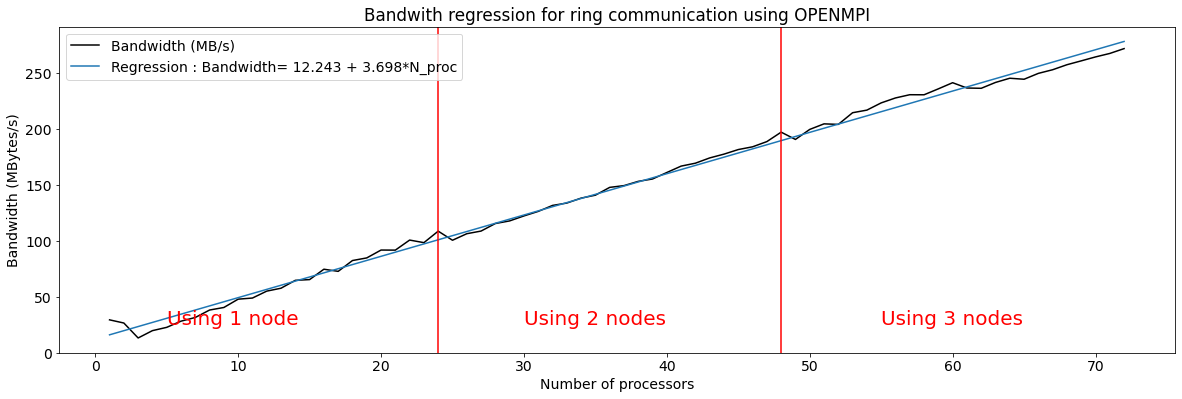

In [18]:
plt.rc('font', size=14) 
plt.figure(figsize=(20,6)) 
plt.plot(x, y2, label = "Bandwidth (MB/s)",color="black")
plt.plot(x,z2, label = "Regression : Bandwidth= 12.243 + 3.698*N_proc")
plt.xlabel('Number of processors')
plt.ylabel('Bandwidth (MBytes/s)')
plt.text(5,25,'Using 1 node',color='red',fontsize=20)
plt.text(30,25,'Using 2 nodes',color='red',fontsize=20)
plt.text(55,25,'Using 3 nodes',color='red',fontsize=20)
plt.axvline(24, 0, 40,color ="red")
plt.axvline(48, 0, 40,color ="red")
plt.title('Bandwith regression for ring communication using OPENMPI')
plt.legend()
#plt.show()
plt.savefig('ring_plot_2.jpg', bbox_inches='tight')